# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

import acquire
import prepare
import encode
import explore

# Wrangle

In [2]:
#bring in the data
telco = acquire.get_telco_data()

In [3]:
#prep the data
train, test, validate = prepare.prep_telco(telco, .8, 123)

In [4]:
#encode the data
encoder_1, encoder_2, encoder_3, encoder_4, train, test, validate = encode.encoded_df(train, test, validate)

In [5]:
print(train.shape)
print(test.shape)
print(validate.shape)

(4507, 26)
(1409, 26)
(1127, 26)


In [6]:
train.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'tenure_years', 'contract_type_encoded',
       'encoded_internet_service_type', 'churn_encoded',
       'payment_type_encoded'],
      dtype='object')

# Explore
- **Hypothesis**: Customers who are month to month are more likely to churn

In [7]:
#take a look at stats info for numerical data
train.tenure.describe()

count    4507.000000
mean       31.942978
std        24.718649
min         0.000000
25%         8.000000
50%        27.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

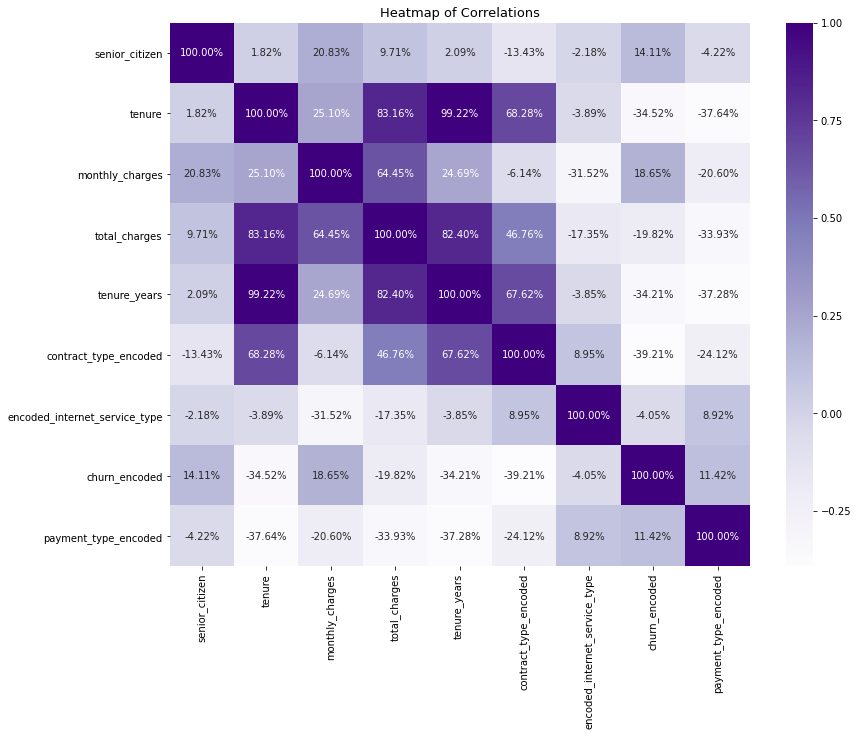

In [8]:
#take a look at correlations of numerical data
explore.corr_heatmap(train)

### Takeaways
- mean for tenure is roughly 2 and a half years
- our max tenure is sitting at 6 years
- contract type seems to be our best indicator of whether a customer will churn or not


### Moving Forward
- Check tenure against various features

## Tenure vs rate of churn

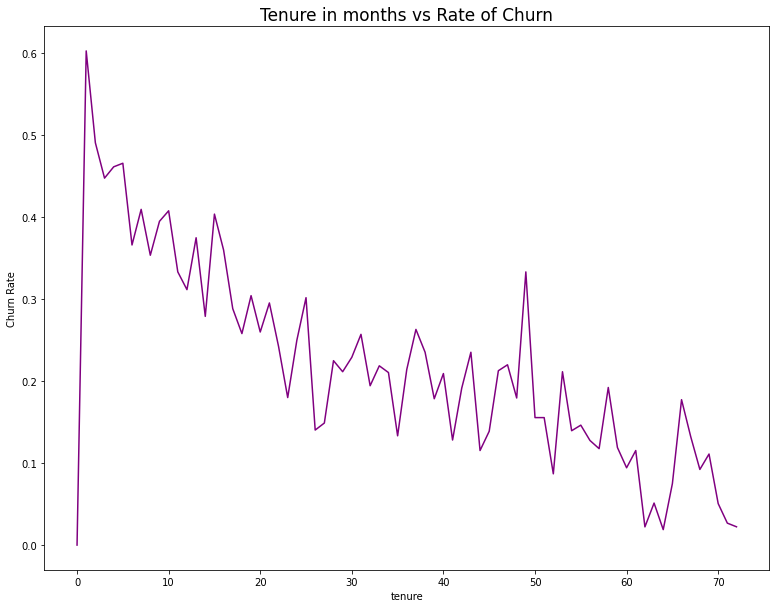

In [30]:
#function to plot rate of churn and tenure
explore.lineplot_rate_of_churn_to_tenure_months(train)

In [47]:
train.tenure.value_counts(ascending=False)

1     403
72    224
2     165
3     134
4     117
     ... 
33     32
36     28
39     28
44     26
0      10
Name: tenure, Length: 73, dtype: int64

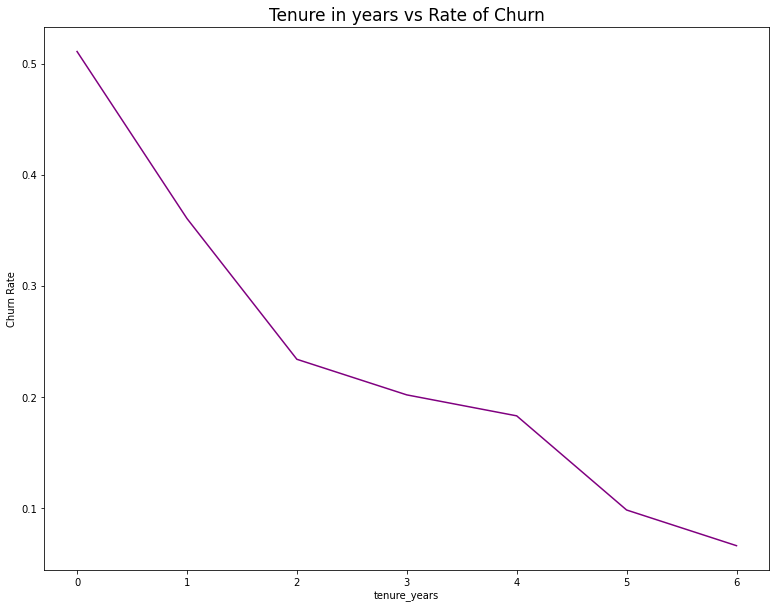

In [10]:
explore.lineplot_rate_of_churn_to_tenure_years(train)

In [48]:
train.tenure_years.value_counts(ascending=False)

0.0    988
1.0    740
2.0    675
6.0    664
4.0    546
5.0    498
3.0    396
Name: tenure_years, dtype: int64

### Takeaways on tenure vs rate of churn: 
We see most customers are churning at lower tenures with a spike right around 49 months. Overall there is a downward trend as tenure increases. However this may also be because most of our customers tenures are below 1 year

## Categorical exploration

In [12]:
ctab = pd.crosstab(train.churn, train.contract_type)
ctab

contract_type,Month-to-month,One year,Two year
churn,,,
No,1432,826,1046
Yes,1062,108,33


Takeaways:
- Far more customers who are on month to month contracts

In [13]:
def plot_categorical_with_churn_rates(df, column_name):
    plt.figure(figsize=(10, 7))
    plt.title(f"Churn Rates by {column_name}")
    df.groupby(column_name).churn_encoded.mean().plot.bar(ec='black', fc='purple', width=.9, label='')
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.ylabel('Churn Rate')
    plt.hlines(df.churn_encoded.mean(), *plt.xlim(), ls='--', color='grey', label='average churn rate')
    plt.legend()
    
def plot_all_categoricals_with_churn_rates(train):
    #1. plot contract_type
    plot_categorical_with_churn_rates(train, "contract_type")
    
    #2. plot gender_type
    plot_categorical_with_churn_rates(train, "gender")
    
    #3. plot partner
    plot_categorical_with_churn_rates(train, "partner")
    
    #4. plot dependents
    plot_categorical_with_churn_rates(train, "dependents")

    #5. plot phone_service
    plot_categorical_with_churn_rates(train, "phone_service")
    
    #6. plot multiple_lines
    plot_categorical_with_churn_rates(train, "multiple_lines")
    
    #7. plot online_security
    plot_categorical_with_churn_rates(train, "online_security")
    
    #8. plot device_protection
    plot_categorical_with_churn_rates(train, "device_protection")
    
    #9. plot device_protection
    plot_categorical_with_churn_rates(train, "online_backup")
    
    #10. plot tech_support
    plot_categorical_with_churn_rates(train, "tech_support")
    
    #11. plot streaming_tv
    plot_categorical_with_churn_rates(train, "streaming_tv")
    
    #12. plot streaming_movies
    plot_categorical_with_churn_rates(train, "streaming_movies")
    
    #13. plot paperless_billing
    plot_categorical_with_churn_rates(train, "paperless_billing")
    
    #14. plot internet_service_type
    plot_categorical_with_churn_rates(train, "internet_service_type")
    
    #15. plot payment_type
    plot_categorical_with_churn_rates(train, "payment_type")
       


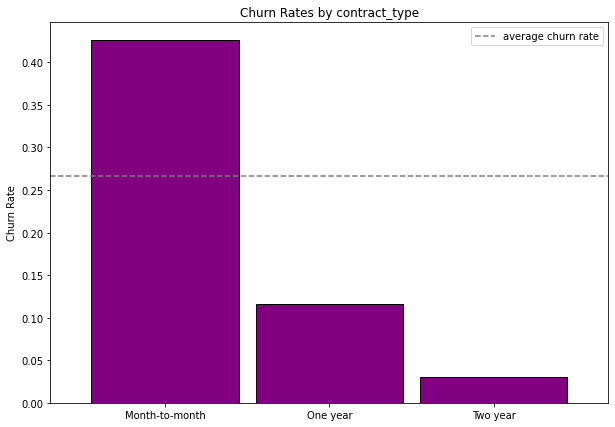

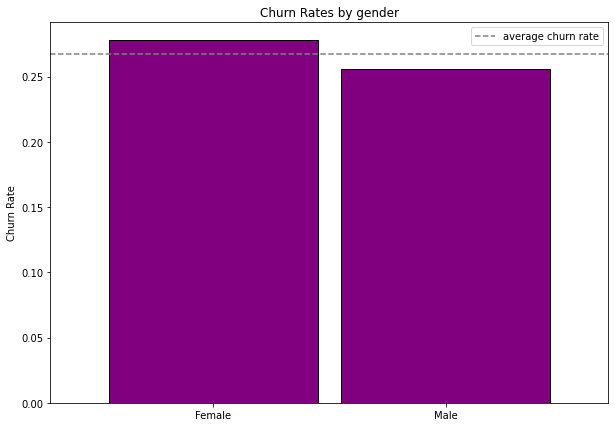

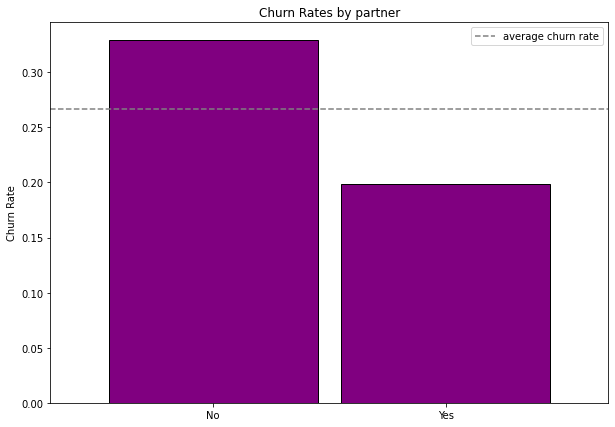

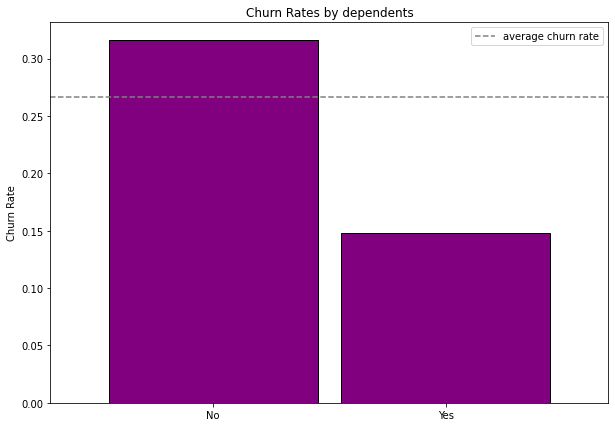

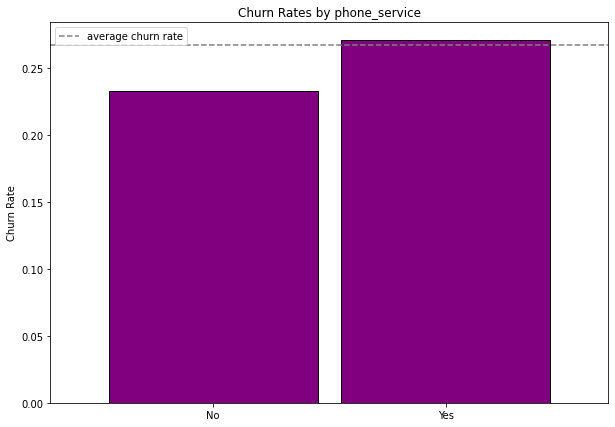

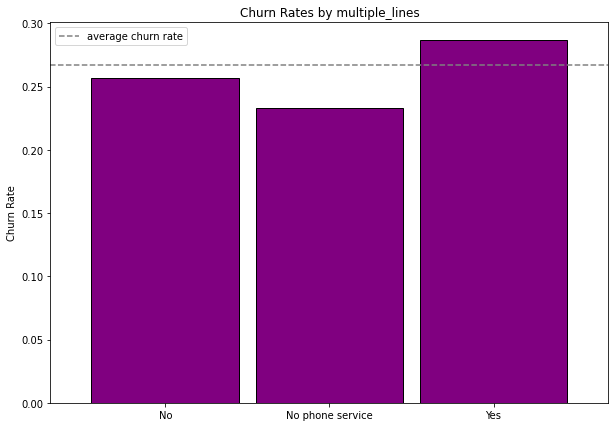

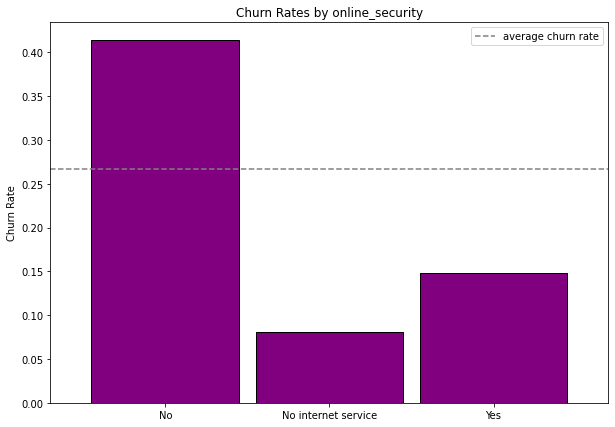

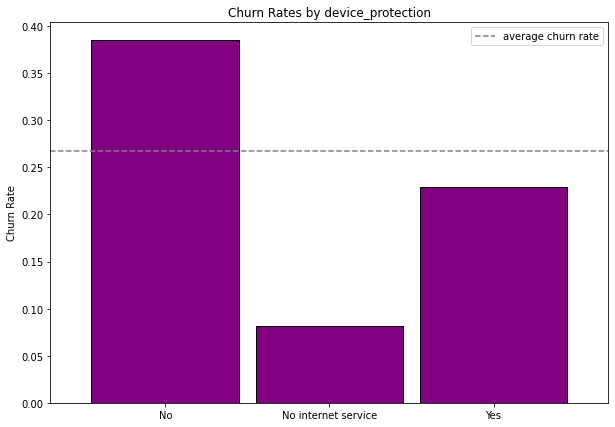

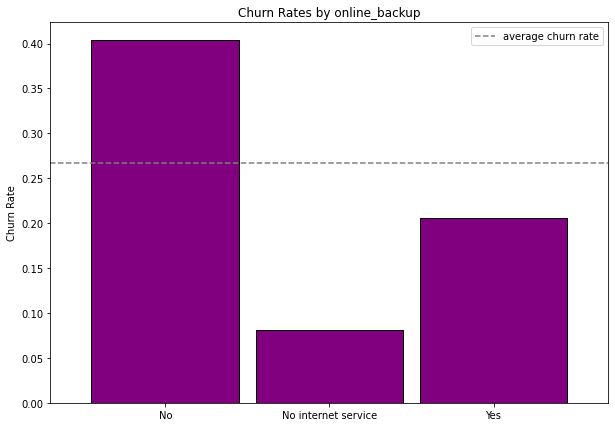

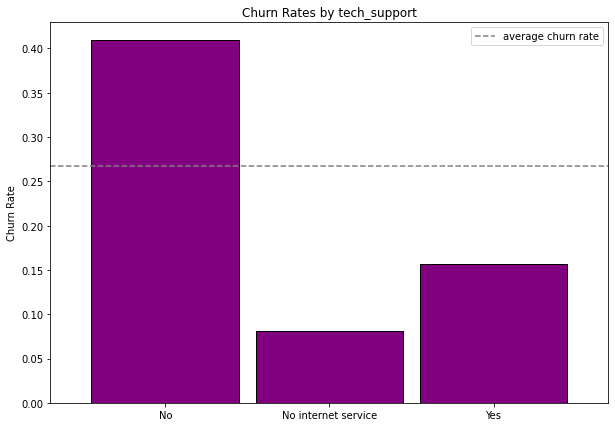

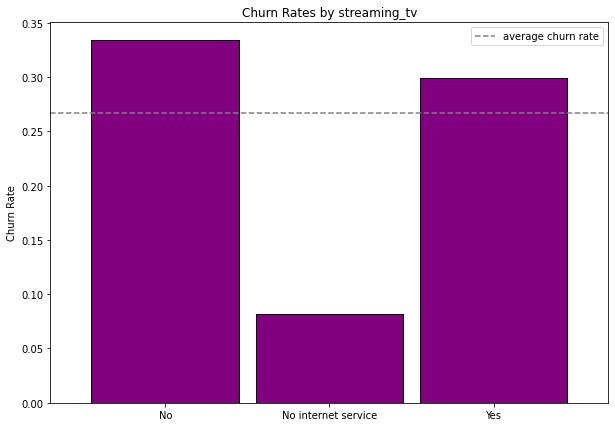

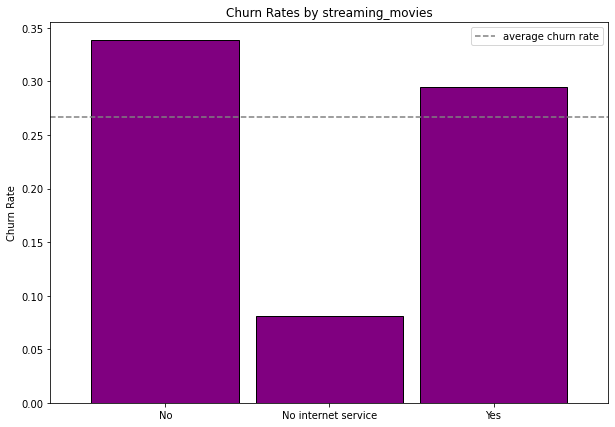

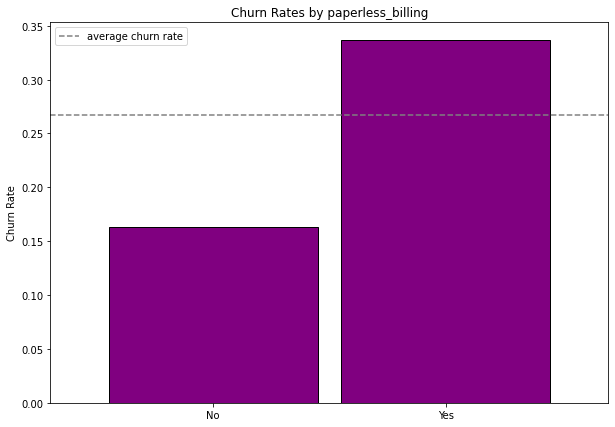

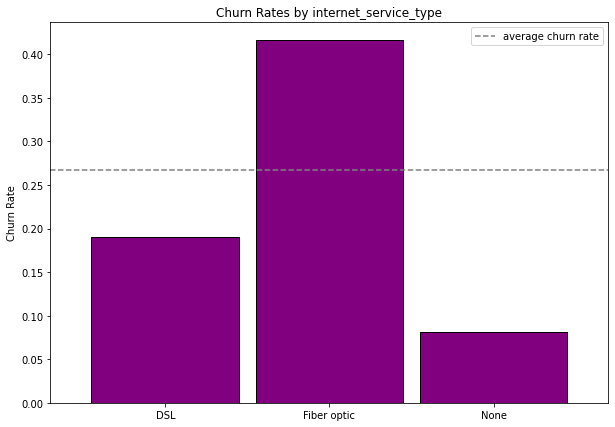

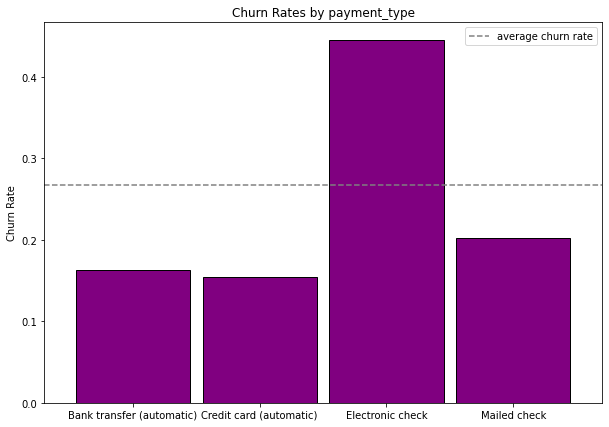

In [14]:
explore.plot_all_categoricals_with_churn_rates(train)

### Takeaways:

- As predicted Month to Month customers are more likely to churn
- Customers not receiving online security are churning at a higher rate
- Customers not receiving device protection are churning at a higher rate
- Customers not receiving online backup are churning at a higher rate
- Customers who do not receive tech support are churning at a higher rate
- Customers who receive paper bills are more likely to churn
- Fiber Optics is more likely to churn - this is surprising since this is considered a premium service.
- Customers who pay via electronic check are more likely to churn
    


 ### Moving Forward
- Check price thresholds of each of the above indicators of customers who are likely to churn with monthly charges
- Check correlations of the above indicators of customers who are likely to churn to one another
- Feature engineering to combine some features that are strongly correlated to each other
- Look to see if churn rates of month-to-month customers at the end of 12 months is the same as those who are 1 year contracts whose tenure as reached 12 months

## Price Threshold

In [50]:
train.dtypes

customer_id                        object
gender                             object
senior_citizen                      int64
partner                            object
dependents                         object
tenure                              int64
phone_service                      object
multiple_lines                     object
online_security                    object
online_backup                      object
device_protection                  object
tech_support                       object
streaming_tv                       object
streaming_movies                   object
paperless_billing                  object
monthly_charges                   float64
total_charges                     float64
churn                              object
contract_type                      object
internet_service_type              object
payment_type                       object
tenure_years                      float64
contract_type_encoded               int64
encoded_internet_service_type     

In [53]:
df_tenure_of_one_year = train[train.tenure == 12]

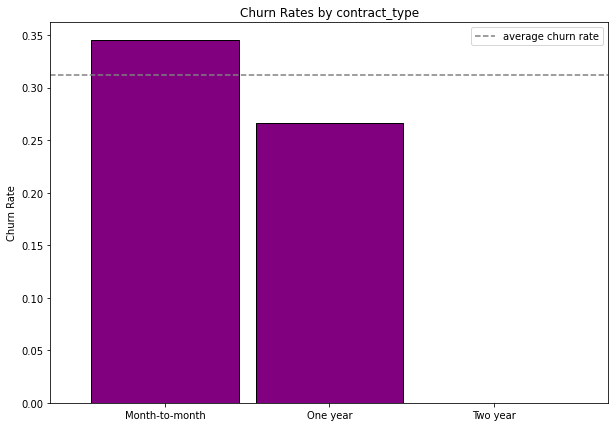

In [56]:
explore.plot_categorical_with_churn_rates(df_tenure_of_one_year, "contract_type")

In [74]:
plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=13)

Text(0.5, 0, '')

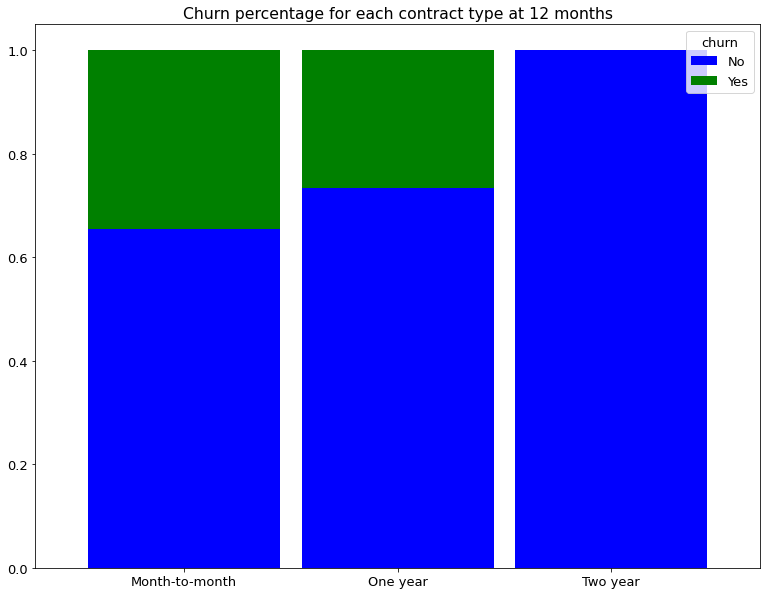

In [82]:
# for every unique contract type, what is the churn percentage?
x1 = "contract_type"
x2 = "churn"
(df_tenure_of_one_year.groupby(x1)[x2]
 .apply(lambda s: s.value_counts(normalize=True)) # custom aggregation to get value counts by group
 .unstack() # turn an index into columns
 .plot.bar(stacked=True, width=.9, color="bg"))
plt.title("Churn percentage for each contract type at 12 months")
plt.legend(title=x2)
plt.xticks(rotation=0)
plt.xlabel('')

### Takeaways
- At the 12 month marker Month to month customers have a slightly lower churn rate than customers with one year contract - this was surprising 

In [79]:
def churn_rate_for_contract_types_at_12_months(train):
    x1 = "contract_type"
    x2 = "churn"
    (train.groupby(x1)[x2]
     .apply(lambda s: s.value_counts(normalize=True)) # custom aggregation to get value counts by group
     .unstack() # turn an index into columns
     .plot.bar(stacked=True, width=.9, color="bg"))
    plt.title("Churn percentage for each contract type at 12 months")
    plt.legend(title=x2)
    plt.xticks(rotation=0)
    plt.xlabel('')

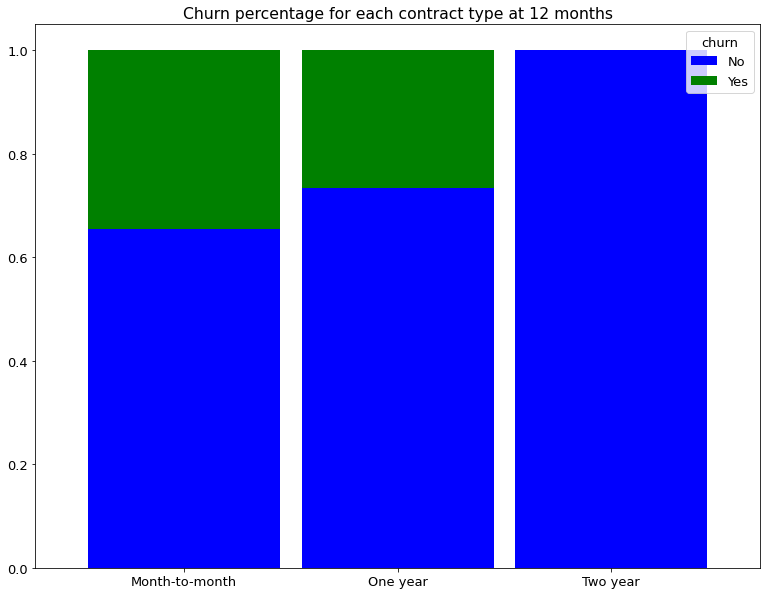

In [83]:
churn_rate_for_contract_types_at_12_months(df_tenure_of_one_year)